# Text Data Loading, Creating a DataFrame

In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import plotly.express as px
import hvplot.pandas
import os
from textblob import TextBlob
import datetime as dt
from wordcloud import WordCloud
plt.style.use('seaborn-whitegrid')
%matplotlib inline

In [2]:
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 50)
pd.set_option('display.width', 1000)

In [3]:
# Import csv file into a dataframe
df_hourly = pd.read_csv('./Resources/Hourly_Data_by_year.csv')

In [4]:
# convert the timezone to CST
df_hourly['Datetime'] = pd.to_datetime(df_hourly['Datetime'], utc=True)
df_hourly['Datetime'] = pd.DatetimeIndex(df_hourly['Datetime']).tz_convert('US/Central')
# rename the column 'Datetime'
df_hourly = df_hourly.rename(columns = {'Datetime':'date'})

In [5]:
df_hourly.head()

date       Open       High        Low      Close  Adj Close   Volume
0 2018-10-22 08:30:00-05:00  52.190998  52.190998  50.548500  50.889999  50.889999  1606345
1 2018-10-22 09:30:00-05:00  50.928001  51.806000  50.857998  51.431999  51.431999   983531
2 2018-10-22 10:30:00-05:00  51.415001  51.772999  51.088001  51.220001  51.220001   628777
3 2018-10-22 11:30:00-05:00  51.258003  51.779999  51.258003  51.414001  51.414001   374134
4 2018-10-22 12:30:00-05:00  51.434002  52.152000  51.318001  51.382000  51.382000   554312

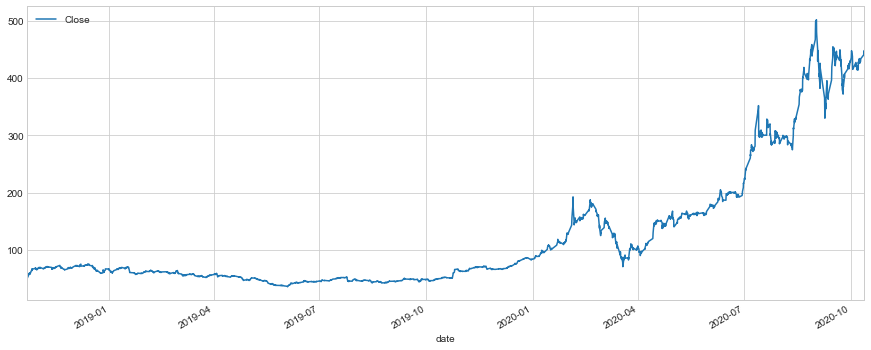

In [6]:
df_hourly.plot(x='date', y='Close', figsize=(15,6));

In [7]:
# # Import csv file into a dataframe
# df_daily = pd.read_csv('./Resources/Daily_trading_data.txt', sep=',')

In [8]:
# df_daily.head()

In [9]:
# # parsing the dates into datetime and changing the format.
# df_daily['Date'] = pd.to_datetime(df_daily['Date']).dt.date
# # rename the column
# df_daily= df_daily.rename(columns ={'Date':'date'})

In [10]:
# df_daily.plot(x='date', y='Close', figsize=(15,5));

In [11]:
# Import a text file to analyze
df_tsla = pd.read_csv('./Resources/reddit_wallstreetbets.csv')

In [12]:
df_tsla.head(10)

date                                               text  Subjectivity  Polarity  Analysis
0  2018-10-21 16:22:47-05:00  lol tesla mattering. electric cars r like 1% o...      0.733333  0.166667  Positive
1  2018-10-21 14:49:59-05:00  **a submission was spammed by vote**  **title:...      0.433333  0.183333  Positive
2  2018-10-21 12:53:07-05:00                                  buy a tesla queer      0.000000  0.000000   Neutral
3  2018-10-21 11:58:44-05:00  once the sale is made why should tesla care ab...      0.400000 -0.050000  Negative
4  2018-10-21 11:15:22-05:00  netflix, amazon, qqq as a whole. tesla. weedst...      0.400000  0.200000  Positive
5  2018-10-21 11:05:48-05:00                                  $tsla, obviously       0.500000  0.000000   Neutral
6  2018-10-21 08:15:08-05:00  or just buy spacex and tesla for $420 million ...      0.000000  0.000000   Neutral
7  2018-10-21 07:55:24-05:00  sqqq calls 2019. also shorting expensive compa...      0.620000 -0.170000  Negative
8  2018-10-21 03:06:43-05:00  oh so you're looking to ride a speculative bub...      0.900000 -0.600000  Negative
9  2018-10-21 02:22:52-05:00  this mothafucka just jinxed the lot of you aut...      0.475000 -0.050000  Negative

In [13]:
# dropping dates before 2018-10-22
# df_tsla = df_tsla[df_tsla['date'] > '2018-10-21']

In [14]:
# # slicing only subreddit = wallstreetbets
# df_tsla = df_tsla[df_tsla['subreddit'] == 'wallstreetbets']
# df_tsla = df_tsla.drop(columns = ['subreddit'])

In [15]:
# df_tsla.to_csv('./Resources/reddit_wallstreetbets.csv', index=False)

In [16]:
df_tsla['date'] = pd.to_datetime(df_tsla['date'], utc=True)
df_tsla['date'] = pd.DatetimeIndex(df_tsla['date']).tz_convert('US/Central')

In [17]:
df_tsla = df_tsla.sort_values('date', ascending = True)
df_tsla = df_tsla.reset_index(drop=True)
df_tsla.head()

date                                               text  Subjectivity  Polarity  Analysis
0 2018-10-21 02:22:52-05:00  this mothafucka just jinxed the lot of you aut...         0.475     -0.05  Negative
1 2018-10-21 03:06:43-05:00  oh so you're looking to ride a speculative bub...         0.900     -0.60  Negative
2 2018-10-21 07:55:24-05:00  sqqq calls 2019. also shorting expensive compa...         0.620     -0.17  Negative
3 2018-10-21 08:15:08-05:00  or just buy spacex and tesla for $420 million ...         0.000      0.00   Neutral
4 2018-10-21 11:05:48-05:00                                  $tsla, obviously          0.500      0.00   Neutral

## Labelling price increase or decrease by interval

In [18]:
# df_daily['daily return'] = df_daily['Close'].pct_change()
df_hourly['hourly return'] = df_hourly['Close'].pct_change()

In [19]:
# dropping dates before 2020-04-30
# df_hourly = df_hourly[df_hourly['date'] > '2020-04-30']

In [20]:
df_hourly.head()

date       Open       High        Low      Close  Adj Close   Volume  hourly return
0 2018-10-22 08:30:00-05:00  52.190998  52.190998  50.548500  50.889999  50.889999  1606345            NaN
1 2018-10-22 09:30:00-05:00  50.928001  51.806000  50.857998  51.431999  51.431999   983531       0.010650
2 2018-10-22 10:30:00-05:00  51.415001  51.772999  51.088001  51.220001  51.220001   628777      -0.004122
3 2018-10-22 11:30:00-05:00  51.258003  51.779999  51.258003  51.414001  51.414001   374134       0.003788
4 2018-10-22 12:30:00-05:00  51.434002  52.152000  51.318001  51.382000  51.382000   554312      -0.000622

In [21]:
# Or add a column with binary number.
def getBinary(score):
    if score <= 0:
        return 0
    else:
        return 1

df_hourly['tick'] = df_hourly['hourly return'].apply(getBinary)
df_hourly.head(10)

date       Open       High        Low      Close  Adj Close   Volume  hourly return  tick
0 2018-10-22 08:30:00-05:00  52.190998  52.190998  50.548500  50.889999  50.889999  1606345            NaN     1
1 2018-10-22 09:30:00-05:00  50.928001  51.806000  50.857998  51.431999  51.431999   983531       0.010650     1
2 2018-10-22 10:30:00-05:00  51.415001  51.772999  51.088001  51.220001  51.220001   628777      -0.004122     0
3 2018-10-22 11:30:00-05:00  51.258003  51.779999  51.258003  51.414001  51.414001   374134       0.003788     1
4 2018-10-22 12:30:00-05:00  51.434002  52.152000  51.318001  51.382000  51.382000   554312      -0.000622     0
5 2018-10-22 13:30:00-05:00  51.400002  52.121998  51.400002  52.009998  52.009998   641530       0.012222     1
6 2018-10-22 14:30:00-05:00  52.047997  52.371998  51.944202  52.202003  52.202003   710669       0.003692     1
7 2018-10-23 08:30:00-05:00  52.723999  56.099998  52.449463  55.200001  55.200001  5546169       0.057431     1
8 2018-10-23 09:30:00-05:00  55.120003  55.671997  54.834003  55.522804  55.522804  1867080       0.005848     1
9 2018-10-23 10:30:00-05:00  55.561840  56.959999  54.944000  56.915001  56.915001  1985484       0.025074     1

In [22]:
df_hourly['date only'] = df_hourly['date'].dt.date
df_hourly['hour'] = df_hourly['date'].dt.hour
df_hourly.head()

date       Open       High        Low      Close  Adj Close   Volume  hourly return  tick   date only  hour
0 2018-10-22 08:30:00-05:00  52.190998  52.190998  50.548500  50.889999  50.889999  1606345            NaN     1  2018-10-22     8
1 2018-10-22 09:30:00-05:00  50.928001  51.806000  50.857998  51.431999  51.431999   983531       0.010650     1  2018-10-22     9
2 2018-10-22 10:30:00-05:00  51.415001  51.772999  51.088001  51.220001  51.220001   628777      -0.004122     0  2018-10-22    10
3 2018-10-22 11:30:00-05:00  51.258003  51.779999  51.258003  51.414001  51.414001   374134       0.003788     1  2018-10-22    11
4 2018-10-22 12:30:00-05:00  51.434002  52.152000  51.318001  51.382000  51.382000   554312      -0.000622     0  2018-10-22    12

### Text dataframe processing

In [23]:
df_tsla['date only'] = df_tsla['date'].dt.date
df_tsla['hour'] = df_tsla['date'].dt.hour
df_tsla.head()

date                                               text  Subjectivity  Polarity  Analysis   date only  hour
0 2018-10-21 02:22:52-05:00  this mothafucka just jinxed the lot of you aut...         0.475     -0.05  Negative  2018-10-21     2
1 2018-10-21 03:06:43-05:00  oh so you're looking to ride a speculative bub...         0.900     -0.60  Negative  2018-10-21     3
2 2018-10-21 07:55:24-05:00  sqqq calls 2019. also shorting expensive compa...         0.620     -0.17  Negative  2018-10-21     7
3 2018-10-21 08:15:08-05:00  or just buy spacex and tesla for $420 million ...         0.000      0.00   Neutral  2018-10-21     8
4 2018-10-21 11:05:48-05:00                                  $tsla, obviously          0.500      0.00   Neutral  2018-10-21    11

### Subjectivity Score Processing (optional)

1. Dropping rows with subjectivity score more than 0.4 or
2. Instead of dropping out, creating a new column with a polarity score weighted by subjectivity score.
  - If subjectivity score <= 0.2, weighting 140% of the corresponding polarity score
  - If  0.2 < subjectivity score <= 0.4, weighting 120% of the corresponding polarity score
  - Likewise,  0.4 < subjectivity score <= 0.6, => 100%   
               0.6 < subjectivity score <= 0.8, => 80%   
               0.8 < subjectivity score <= 1.0, => 60%

#### 1. Dropping all rows that have subjectivity scores more than 0.4

In [24]:
df_tsla_drop = df_tsla[df_tsla['Subjectivity']<= 0.4]

In [25]:
df_tsla_drop.head()

date                                               text  Subjectivity  Polarity  Analysis   date only  hour
3  2018-10-21 08:15:08-05:00  or just buy spacex and tesla for $420 million ...           0.0      0.00   Neutral  2018-10-21     8
5  2018-10-21 11:15:22-05:00  netflix, amazon, qqq as a whole. tesla. weedst...           0.4      0.20  Positive  2018-10-21    11
6  2018-10-21 11:58:44-05:00  once the sale is made why should tesla care ab...           0.4     -0.05  Negative  2018-10-21    11
7  2018-10-21 12:53:07-05:00                                  buy a tesla queer           0.0      0.00   Neutral  2018-10-21    12
14 2018-10-21 22:22:42-05:00  davey look at this, why not buy these tsla cal...           0.0      0.00   Neutral  2018-10-21    22

#### 2. Add a new column with the weighted polarity score

In [26]:
df_tsla_weight = df_tsla.copy()

In [27]:
def getWeight(score):
    if score <= 0.2:
        return 1.4
    elif score <=0.4:
        return 1.2
    elif score <=0.6:
        return 1.0
    elif score <=0.8:
        return 0.8
    else:
        return 0.6


df_tsla_weight['Adj Polarity'] = df_tsla['Subjectivity'].apply(getWeight)*df_tsla['Polarity']
df_tsla_weight.tail()     

date                                               text  Subjectivity  Polarity  Analysis   date only  hour  Adj Polarity
371421 2020-10-14 18:55:14-05:00                                    gme slv or tsla      0.000000  0.000000   Neutral  2020-10-14    18      0.000000
371422 2020-10-14 18:57:12-05:00  yeah its sus she knows what an otm call is, an...      0.000000  0.000000   Neutral  2020-10-14    18      0.000000
371423 2020-10-14 18:57:21-05:00  introducing the tesla mcdonalds meal: tell the...      0.000000  0.000000   Neutral  2020-10-14    18      0.000000
371424 2020-10-14 18:57:53-05:00                                       tsla 500 eow      0.000000  0.000000   Neutral  2020-10-14    18      0.000000
371425 2020-10-14 18:59:22-05:00  you're stupid too.  mainly because you can tra...      0.666667 -0.316667  Negative  2020-10-14    18     -0.253333

## Merging Dataframes

#### 1. For df_tsla_drop

In [28]:
# Merging the dataframes by using reduce function
from functools import reduce
data_frames = [df_tsla_drop, df_hourly]
df_drop = reduce(lambda  left,right: pd.merge(left,right,on=['date only', 'hour'],
                                            how='outer'), data_frames)
df_drop.head()

date_x                                               text  Subjectivity  Polarity  Analysis   date only  hour date_y  Open  High  Low  Close  Adj Close  Volume  hourly return  tick
0 2018-10-21 08:15:08-05:00  or just buy spacex and tesla for $420 million ...           0.0      0.00   Neutral  2018-10-21     8    NaT   NaN   NaN  NaN    NaN        NaN     NaN            NaN   NaN
1 2018-10-21 11:15:22-05:00  netflix, amazon, qqq as a whole. tesla. weedst...           0.4      0.20  Positive  2018-10-21    11    NaT   NaN   NaN  NaN    NaN        NaN     NaN            NaN   NaN
2 2018-10-21 11:58:44-05:00  once the sale is made why should tesla care ab...           0.4     -0.05  Negative  2018-10-21    11    NaT   NaN   NaN  NaN    NaN        NaN     NaN            NaN   NaN
3 2018-10-21 12:53:07-05:00                                  buy a tesla queer           0.0      0.00   Neutral  2018-10-21    12    NaT   NaN   NaN  NaN    NaN        NaN     NaN            NaN   NaN
4 2018-10-21 22:22:42-05:00  davey look at this, why not buy these tsla cal...           0.0      0.00   Neutral  2018-10-21    22    NaT   NaN   NaN  NaN    NaN        NaN     NaN            NaN   NaN

#### 2. For df_tsla_weight

In [29]:
# Merging the dataframes by using reduce function
from functools import reduce
data_frames = [df_tsla_weight, df_hourly]
df_weight = reduce(lambda  left,right: pd.merge(left,right,on=['date only', 'hour'],
                                            how='outer'), data_frames)
df_weight.head()

date_x                                               text  Subjectivity  Polarity  Analysis   date only  hour  Adj Polarity date_y  Open  High  Low  Close  Adj Close  Volume  hourly return  tick
0 2018-10-21 02:22:52-05:00  this mothafucka just jinxed the lot of you aut...         0.475     -0.05  Negative  2018-10-21     2        -0.050    NaT   NaN   NaN  NaN    NaN        NaN     NaN            NaN   NaN
1 2018-10-21 03:06:43-05:00  oh so you're looking to ride a speculative bub...         0.900     -0.60  Negative  2018-10-21     3        -0.360    NaT   NaN   NaN  NaN    NaN        NaN     NaN            NaN   NaN
2 2018-10-21 07:55:24-05:00  sqqq calls 2019. also shorting expensive compa...         0.620     -0.17  Negative  2018-10-21     7        -0.136    NaT   NaN   NaN  NaN    NaN        NaN     NaN            NaN   NaN
3 2018-10-21 08:15:08-05:00  or just buy spacex and tesla for $420 million ...         0.000      0.00   Neutral  2018-10-21     8         0.000    NaT   NaN   NaN  NaN    NaN        NaN     NaN            NaN   NaN
4 2018-10-21 11:05:48-05:00                                  $tsla, obviously          0.500      0.00   Neutral  2018-10-21    11         0.000    NaT   NaN   NaN  NaN    NaN        NaN     NaN            NaN   NaN

In [30]:
# Drop unnecessary columns
df_drop = df_drop.drop(columns = ['Open', 'High', 'Low', 'Volume', 'Adj Close', 'Volume'])
df_weight = df_weight.drop(columns = ['Open', 'High', 'Low', 'Volume', 'Adj Close', 'Volume', 'Polarity'])

In [31]:
df_drop['date only'] = pd.to_datetime(df_drop['date only'])
df_weight['date only'] = pd.to_datetime(df_weight['date only'])

In [32]:
df_drop = df_drop[['date only', 'hour', 'Close', 'hourly return', 'tick','text', 'Subjectivity', 'Polarity', 'Analysis', 'date_x','date_y']]
df_weight = df_weight[['date only', 'hour', 'Close', 'hourly return', 'tick','text', 'Subjectivity', 'Adj Polarity', 'Analysis', 'date_x','date_y']]

In [33]:
df_drop = df_drop.sort_values(['date only', 'hour'], ascending=True)
df_weight = df_weight.sort_values(['date only', 'hour'], ascending=True)

In [34]:
df_weight.head()

date only  hour  Close  hourly return  tick                                               text  Subjectivity  Adj Polarity  Analysis                    date_x date_y
0 2018-10-21     2    NaN            NaN   NaN  this mothafucka just jinxed the lot of you aut...         0.475        -0.050  Negative 2018-10-21 02:22:52-05:00    NaT
1 2018-10-21     3    NaN            NaN   NaN  oh so you're looking to ride a speculative bub...         0.900        -0.360  Negative 2018-10-21 03:06:43-05:00    NaT
2 2018-10-21     7    NaN            NaN   NaN  sqqq calls 2019. also shorting expensive compa...         0.620        -0.136  Negative 2018-10-21 07:55:24-05:00    NaT
3 2018-10-21     8    NaN            NaN   NaN  or just buy spacex and tesla for $420 million ...         0.000         0.000   Neutral 2018-10-21 08:15:08-05:00    NaT
4 2018-10-21    11    NaN            NaN   NaN                                  $tsla, obviously          0.500         0.000   Neutral 2018-10-21 11:05:48-05:00    NaT

In [35]:
# df.to_csv('./Resources/elonmusk_tweets_hourly_price.csv', index=False)

## Analysis

### Things to be considered
- What sentiment score should we use?    
  (Subjectivity or Polarity, or both combined - weighting on Polarity score with more objective one)    
- Which score value should we use to represent the same hourly(or daily) window, in case of having multiple scores?    
  (mean, count, add, take the first one or the last one, etc)   
- How to deal with texts generated off market hours including weekends?   
  (dropping them out or tagging them the same (up and down) ticker with the most recent one etc)   
 
 

### 1. Using various sentiment score(Polarity only) for all texts regardless of market hour. 

In [36]:
# take the average polarity scores in the same hour window.
df_mean = df_drop.groupby(['date only', 'hour']).mean()
df_sum = df_drop.groupby(['date only', 'hour']).sum()
df_count = df_drop.groupby(['date only', 'hour']).count()
df_first = df_drop.groupby(['date only', 'hour']).first()
df_last = df_drop.groupby(['date only', 'hour']).last()
df_data = df_mean.copy()

In [37]:
df_data = df_data.rename(columns = {'Polarity':'polarity mean'})
df_data['polarity sum'] = df_sum['Polarity']
df_data['polarity count'] = df_count['Polarity']
df_data['polarity first'] = df_first['Polarity']
df_data['polarity last'] = df_last['Polarity']
df_data.head()

Close  hourly return  tick  Subjectivity  polarity mean  polarity sum  polarity count  polarity first  polarity last
date only  hour                                                                                                                      
2018-10-21 8       NaN            NaN   NaN           0.0          0.000          0.00               1             0.0           0.00
           11      NaN            NaN   NaN           0.4          0.075          0.15               2             0.2          -0.05
           12      NaN            NaN   NaN           0.0          0.000          0.00               1             0.0           0.00
           22      NaN            NaN   NaN           0.0          0.000          0.00               1             0.0           0.00
2018-10-22 1       NaN            NaN   NaN           0.3          0.000          0.00               1             0.0           0.00

In [38]:
df_data['polarity mean change'] = df_data['polarity mean'].pct_change()
df_data['polarity sum change'] = df_data['polarity sum'].pct_change()
df_data['polarity count change'] = df_data['polarity count'].pct_change()
df_data['polarity first change'] = df_data['polarity first'].pct_change()
df_data['polarity last change'] = df_data['polarity last'].pct_change()
df_data.head()

Close  hourly return  tick  Subjectivity  polarity mean  polarity sum  polarity count  polarity first  polarity last  polarity mean change  polarity sum change  polarity count change  polarity first change  polarity last change
date only  hour                                                                                                                                                                                                                                     
2018-10-21 8       NaN            NaN   NaN           0.0          0.000          0.00               1             0.0           0.00                   NaN                  NaN                    NaN                    NaN                   NaN
           11      NaN            NaN   NaN           0.4          0.075          0.15               2             0.2          -0.05                   inf                  inf                    1.0                    inf                  -inf
           12      NaN            NaN   NaN           0.0          0.000          0.00               1             0.0           0.00                  -1.0                 -1.0                   -0.5                   -1.0                  -1.0
           22      NaN            NaN   NaN           0.0          0.000          0.00               1             0.0           0.00                   NaN                  NaN                    0.0                    NaN                   NaN
2018-10-22 1       NaN            NaN   NaN           0.3          0.000          0.00               1             0.0           0.00                   NaN                  NaN                    0.0                    NaN                   NaN

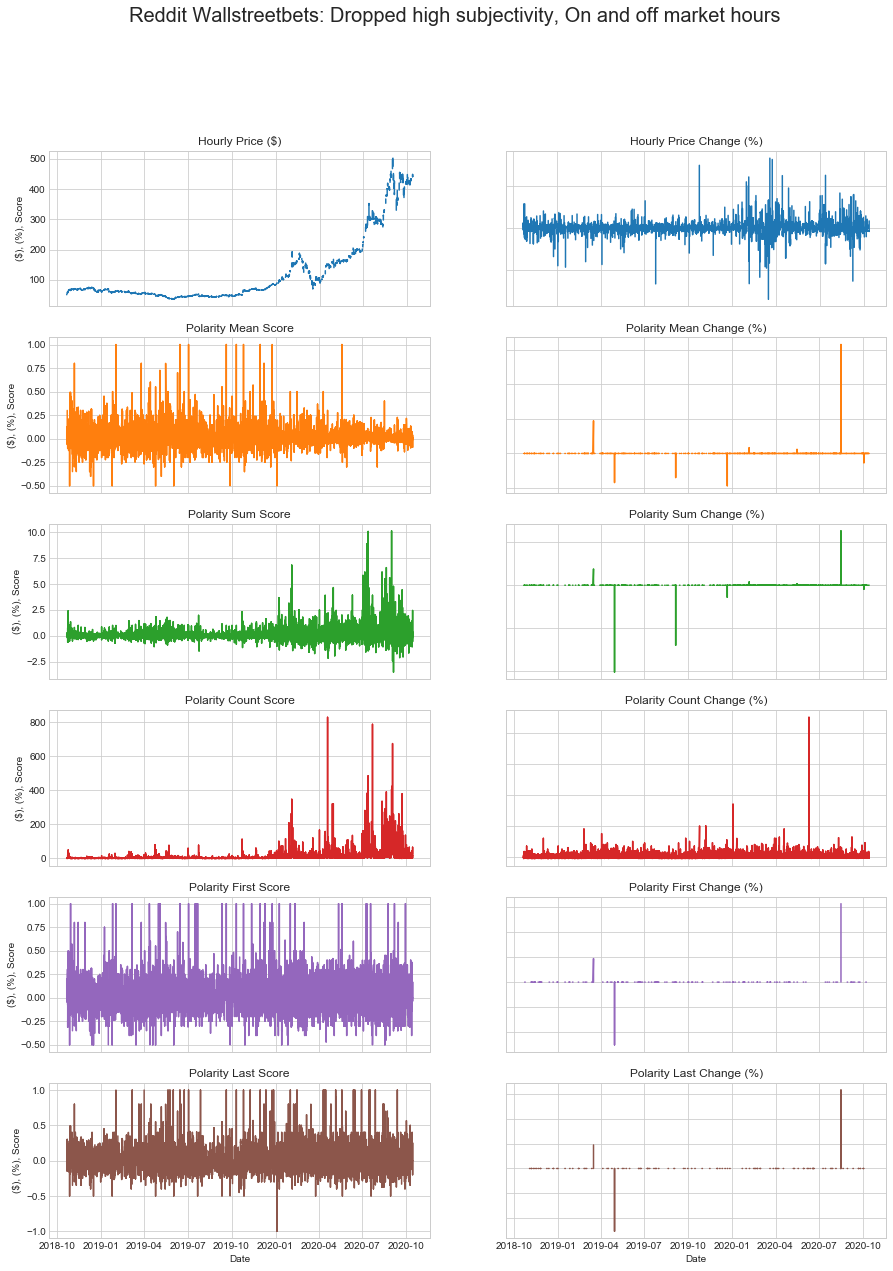

In [39]:
# plot total overviews
date_only = df_data.index.get_level_values(0)

fig, axs = plt.subplots(6, 2, figsize=(15,20))
fig.suptitle('Reddit Wallstreetbets: Dropped high subjectivity, On and off market hours', fontsize=20)

axs[0, 0].plot(date_only, df_data['Close'])
axs[0, 0].set_title('Hourly Price ($)')
axs[1, 0].plot(date_only, df_data['polarity mean'], 'tab:orange')
axs[1, 0].set_title('Polarity Mean Score')
axs[2, 0].plot(date_only, df_data['polarity sum'], 'tab:green')
axs[2, 0].set_title('Polarity Sum Score')
axs[3, 0].plot(date_only, df_data['polarity count'], 'tab:red')
axs[3, 0].set_title('Polarity Count Score')
axs[4, 0].plot(date_only, df_data['polarity first'], 'tab:purple')
axs[4, 0].set_title('Polarity First Score')
axs[5, 0].plot(date_only, df_data['polarity last'], 'tab:brown')
axs[5, 0].set_title('Polarity Last Score')

axs[0, 1].plot(date_only, df_data['hourly return'])
axs[0, 1].set_title('Hourly Price Change (%)')
axs[1, 1].plot(date_only, df_data['polarity mean change'], 'tab:orange')
axs[1, 1].set_title('Polarity Mean Change (%)')
axs[2, 1].plot(date_only, df_data['polarity sum change'], 'tab:green')
axs[2, 1].set_title('Polarity Sum Change (%)')
axs[3, 1].plot(date_only, df_data['polarity count change'], 'tab:red')
axs[3, 1].set_title('Polarity Count Change (%)')
axs[4, 1].plot(date_only, df_data['polarity first change'], 'tab:purple')
axs[4, 1].set_title('Polarity First Change (%)')
axs[5, 1].plot(date_only, df_data['polarity last change'], 'tab:brown')
axs[5, 1].set_title('Polarity Last Change (%)')

for ax in axs.flat:
    ax.set(xlabel='Date', ylabel='($), (%), Score')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

In [40]:
# # plot polarity mean
# date_only = df_data.index.get_level_values(0)

# fig, ax1 = plt.subplots(figsize=(15,6))

# ax2 = ax1.twinx()
# ax1.plot(date_only, df_data['Close'], color='g')
# ax2.plot(date_only, df_data['polarity mean'], color='b', alpha=0.2)

# ax1.set_xlabel('Date')
# ax1.set_ylabel('Hourly Price ($)', color='g')
# ax2.set_ylabel('Polarity Score', color='b')
# ax1.set_xticklabels(date_only, rotation=45, size=8)

# fig.show();

In [41]:
correlation_drop = df_data.corr()
correlation_drop

Close  hourly return      tick  Subjectivity  polarity mean  polarity sum  polarity count  polarity first  polarity last  polarity mean change  polarity sum change  polarity count change  polarity first change  polarity last change
Close                  1.000000       0.034185 -0.006940     -0.153140      -0.009856      0.325934        0.634264       -0.024869       0.000616              0.014411             0.015296              -0.010045               0.017983              0.018188
hourly return          0.034185       1.000000  0.547026     -0.019366       0.022981      0.084775        0.030712        0.020217      -0.003027              0.004189             0.004247               0.053717               0.006524              0.006849
tick                  -0.006940       0.547026  1.000000     -0.006599       0.025032      0.040788        0.003914        0.037120       0.020211              0.019821             0.020323               0.021669               0.030835              0.030016
Subjectivity          -0.153140      -0.019366 -0.006599      1.000000       0.161461      0.009610       -0.089025        0.099302       0.099741              0.031973             0.017730              -0.019291               0.036098              0.036019
polarity mean         -0.009856       0.022981  0.025032      0.161461       1.000000      0.336781       -0.018286        0.620098       0.621730              0.042318             0.012169              -0.006678               0.042186              0.042178
polarity sum           0.325934       0.084775  0.040788      0.009610       0.336781      1.000000        0.516853        0.211331       0.198811              0.001052            -0.003016               0.029347              -0.000739             -0.000667
polarity count         0.634264       0.030712  0.003914     -0.089025      -0.018286      0.516853        1.000000       -0.008862      -0.011261             -0.002612             0.001975               0.072804              -0.003818             -0.003533
polarity first        -0.024869       0.020217  0.037120      0.099302       0.620098      0.211331       -0.008862        1.000000       0.223303              0.022528             0.002447               0.005546               0.017749              0.018595
polarity last          0.000616      -0.003027  0.020211      0.099741       0.621730      0.198811       -0.011261        0.223303       1.000000              0.022176             0.002867              -0.006151               0.017681              0.017640
polarity mean change   0.014411       0.004189  0.019821      0.031973       0.042318      0.001052       -0.002612        0.022528       0.022176              1.000000             0.723220              -0.018264               0.900855              0.867419
polarity sum change    0.015296       0.004247  0.020323      0.017730       0.012169     -0.003016        0.001975        0.002447       0.002867              0.723220             1.000000              -0.051188               0.816566              0.812042
polarity count change -0.010045       0.053717  0.021669     -0.019291      -0.006678      0.029347        0.072804        0.005546      -0.006151             -0.018264            -0.051188               1.000000              -0.037076             -0.037559
polarity first change  0.017983       0.006524  0.030835      0.036098       0.042186     -0.000739       -0.003818        0.017749       0.017681              0.900855             0.816566              -0.037076               1.000000              1.000000
polarity last change   0.018188       0.006849  0.030016      0.036019       0.042178     -0.000667       -0.003533        0.018595       0.017640              0.867419             0.812042              -0.037559               1.000000              1.000000

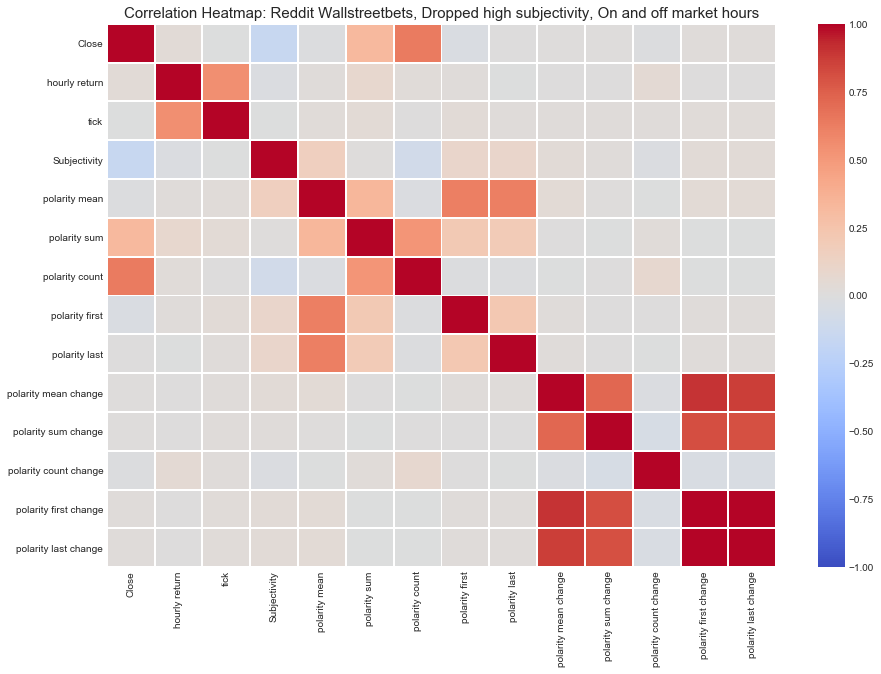

In [42]:
import seaborn as sns
plt.figure(figsize=(15,10))
plt.title('Correlation Heatmap: Reddit Wallstreetbets, Dropped high subjectivity, On and off market hours', fontsize=15)
sns.heatmap(correlation_drop, vmin=-1, vmax=1, linewidth=1, cmap='coolwarm');

### 2. Using various sentiment score(Polarity only) for only the texts that matches with market hours. 

In [43]:
# Dropping unmatching rows 
df_2 = df_data.dropna()
df_2

Close  hourly return  tick  Subjectivity  polarity mean  polarity sum  polarity count  polarity first  polarity last  polarity mean change  polarity sum change  polarity count change  polarity first change  polarity last change
date only  hour                                                                                                                                                                                                                                          
2018-10-22 9      51.431999       0.010650   1.0      0.096296      -0.051852     -0.155556               3        0.000000       0.000000         -1.172840e+00                 -inf                    inf          -1.000000e+00         -1.000000e+00
           12     51.382000      -0.000622   0.0      0.375000       0.104167      0.104167               1        0.104167       0.104167          5.625000e-01                  inf                    inf                    inf         -2.187500e-01
           13     52.009998       0.012222   1.0      0.000000       0.000000      0.000000               1        0.000000       0.000000         -1.000000e+00        -1.000000e+00               0.000000          -1.000000e+00         -1.000000e+00
2018-10-23 8      55.200001       0.057431   1.0      0.125000       0.058681      0.704167              12        0.000000      -0.062500         -4.819482e-01         1.072207e+00               3.000000          -1.000000e+00                  -inf
           10     56.915001       0.025074   1.0      0.161670      -0.048332     -0.434987               9       -0.312500       0.000000          7.634599e-01        -2.064431e-01              -0.550000                   -inf         -1.000000e+00
2018-10-24 8      57.579998      -0.021746   0.0      0.157429       0.019874      0.178869               9        0.000000       0.000000          3.415152e-01         3.024545e+00               2.000000          -1.000000e+00         -1.000000e+00
2018-10-25 8      61.059998       0.057463   1.0      0.120313      -0.006250     -0.025000               4        0.025000      -0.050000                  -inf                 -inf               3.000000                    inf                  -inf
           9      62.178001       0.018310   1.0      0.065799      -0.027257     -0.218056               8       -0.062500      -0.155556          3.361111e+00         7.722222e+00               1.000000          -3.500000e+00          2.111111e+00
           10     61.614002      -0.009071   0.0      0.340000       0.060000      0.060000               1        0.060000       0.060000         -3.201274e+00        -1.275159e+00              -0.875000          -1.960000e+00         -1.385714e+00
           11     62.168324       0.008997   1.0      0.125000       0.050000      0.100000               2        0.000000       0.100000         -1.666667e-01         6.666667e-01               1.000000          -1.000000e+00          6.666667e-01
2018-10-29 8      67.909996       0.026917   1.0      0.125625      -0.040958     -0.204792               5       -0.078125       0.000000          2.276667e+00         3.095833e+00               0.250000                   -inf         -1.000000e+00
           11     67.222000       0.011862   1.0      0.150000       0.037500      0.150000               4        0.000000       0.200000          6.330645e-01                  inf                    inf          -1.000000e+00                   inf
           12     67.641998       0.006248   1.0      0.222222       0.010417      0.041667               4       -0.133333       0.200000         -7.222222e-01        -7.222222e-01               0.000000                   -inf          0.000000e+00
           13     67.139999      -0.007421   0.0      0.066667       0.000000      0.000000               1        0.000000       0.000000         -1.000000e+00        -1.000000e+00              -0.750000          -1.000000e+00         -1.000000e+00
           14     67.3

C:\Users\Sungwon Kim\anaconda3\envs\dev\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


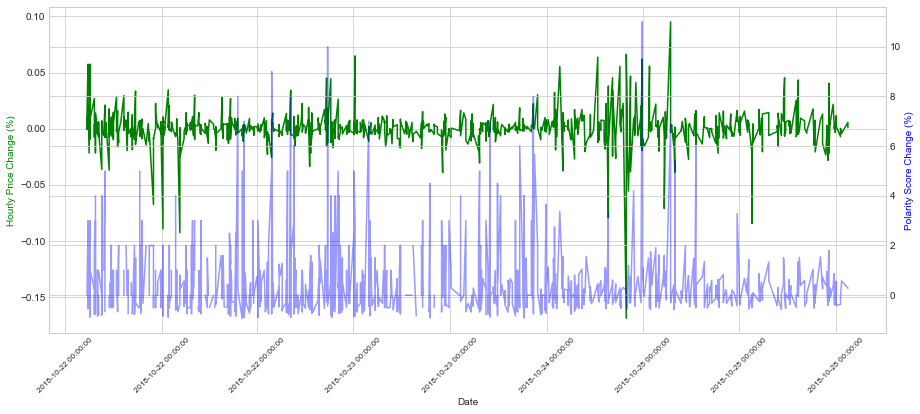

In [44]:
# plot polarity mean change vs hourly return
date_only = df_2.index.get_level_values(0)

fig, ax1 = plt.subplots(figsize=(15,6))

ax2 = ax1.twinx()
ax1.plot(date_only, df_2['hourly return'], color='g')
ax2.plot(date_only, df_2['polarity count change'], color='b', alpha=0.4)

ax1.set_xlabel('Date')
ax1.set_ylabel('Hourly Price Change (%)', color='g')
ax2.set_ylabel('Polarity Score Change (%)', color='b')
ax1.set_xticklabels(date_only, rotation=45, size=8)

fig.show();

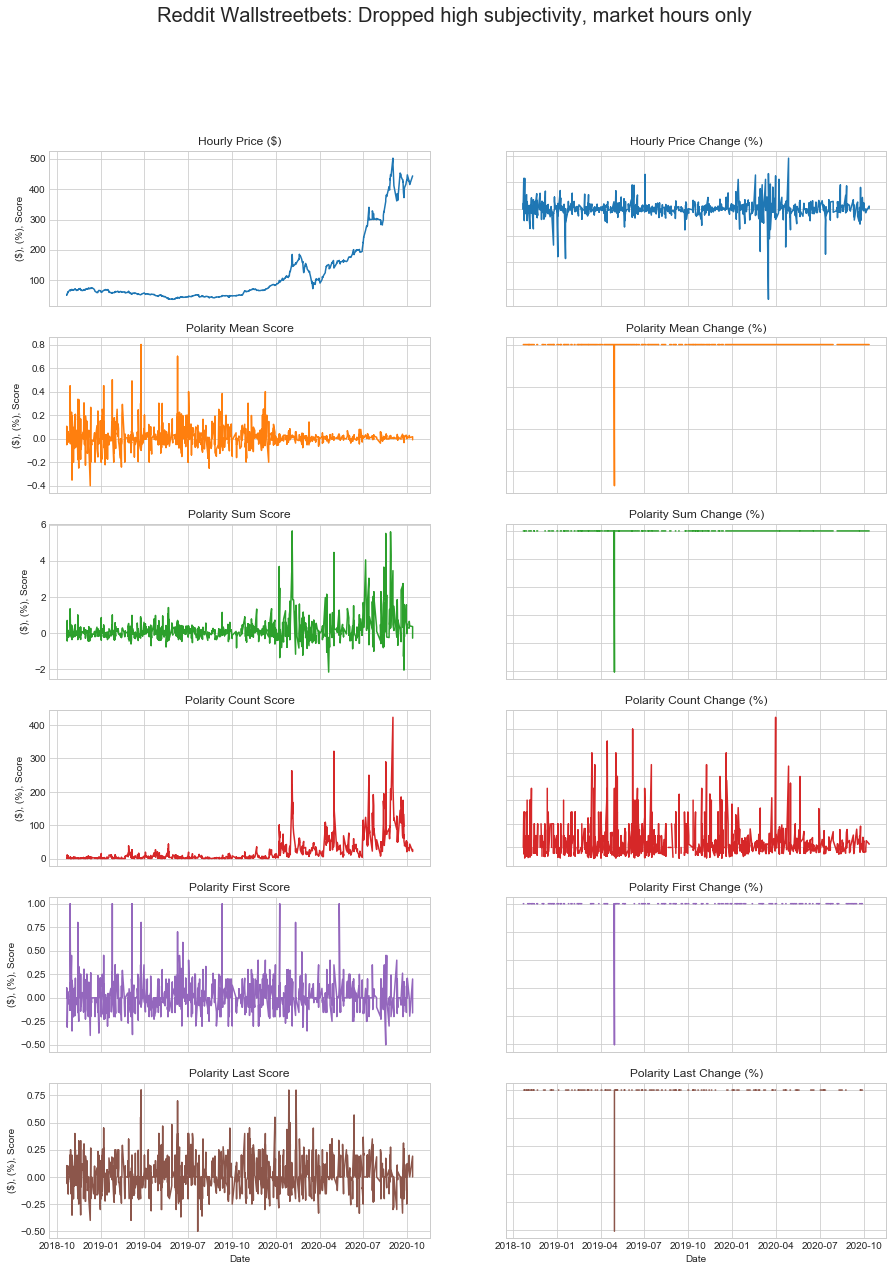

In [45]:
# plot total overviews
date_only = df_2.index.get_level_values(0)

fig, axs = plt.subplots(6, 2, figsize=(15,20))
fig.suptitle('Reddit Wallstreetbets: Dropped high subjectivity, market hours only', fontsize=20)

axs[0, 0].plot(date_only, df_2['Close'])
axs[0, 0].set_title('Hourly Price ($)')
axs[1, 0].plot(date_only, df_2['polarity mean'], 'tab:orange')
axs[1, 0].set_title('Polarity Mean Score')
axs[2, 0].plot(date_only, df_2['polarity sum'], 'tab:green')
axs[2, 0].set_title('Polarity Sum Score')
axs[3, 0].plot(date_only, df_2['polarity count'], 'tab:red')
axs[3, 0].set_title('Polarity Count Score')
axs[4, 0].plot(date_only, df_2['polarity first'], 'tab:purple')
axs[4, 0].set_title('Polarity First Score')
axs[5, 0].plot(date_only, df_2['polarity last'], 'tab:brown')
axs[5, 0].set_title('Polarity Last Score')

axs[0, 1].plot(date_only, df_2['hourly return'])
axs[0, 1].set_title('Hourly Price Change (%)')
axs[1, 1].plot(date_only, df_2['polarity mean change'], 'tab:orange')
axs[1, 1].set_title('Polarity Mean Change (%)')
axs[2, 1].plot(date_only, df_2['polarity sum change'], 'tab:green')
axs[2, 1].set_title('Polarity Sum Change (%)')
axs[3, 1].plot(date_only, df_2['polarity count change'], 'tab:red')
axs[3, 1].set_title('Polarity Count Change (%)')
axs[4, 1].plot(date_only, df_2['polarity first change'], 'tab:purple')
axs[4, 1].set_title('Polarity First Change (%)')
axs[5, 1].plot(date_only, df_2['polarity last change'], 'tab:brown')
axs[5, 1].set_title('Polarity Last Change (%)')

for ax in axs.flat:
    ax.set(xlabel='Date', ylabel='($), (%), Score')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

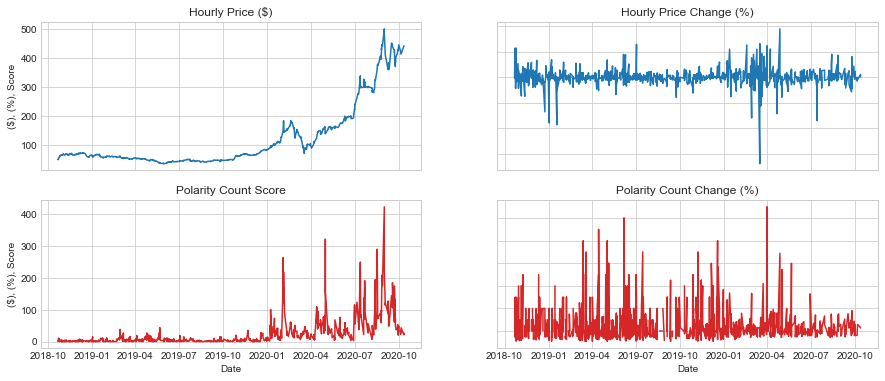

In [46]:
date_only = df_2.index.get_level_values(0)

fig, axs = plt.subplots(2, 2, figsize=(15,6))
axs[0, 0].plot(date_only, df_2['Close'])
axs[0, 0].set_title('Hourly Price ($)')
axs[1, 0].plot(date_only, df_2['polarity count'], 'tab:red')
axs[1, 0].set_title('Polarity Count Score')

axs[0, 1].plot(date_only, df_2['hourly return'])
axs[0, 1].set_title('Hourly Price Change (%)')
axs[1, 1].plot(date_only, df_2['polarity count change'], 'tab:red')
axs[1, 1].set_title('Polarity Count Change (%)')


for ax in axs.flat:
    ax.set(xlabel='Date', ylabel='($), (%), Score')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

In [47]:
correlation_drop_2 = df_2.corr()
correlation_drop_2

Close  hourly return      tick  Subjectivity  polarity mean  polarity sum  polarity count  polarity first  polarity last  polarity mean change  polarity sum change  polarity count change  polarity first change  polarity last change
Close                  1.000000       0.012348  0.019279     -0.273649      -0.025469      0.353487        0.665429       -0.013789       0.002783              0.020412             0.021521              -0.067705               0.022966              0.022694
hourly return          0.012348       1.000000  0.563388     -0.018164       0.004602     -0.021557       -0.034298        0.002327      -0.022219              0.006808             0.006969               0.072090               0.008496              0.009704
tick                   0.019279       0.563388  1.000000      0.001343       0.032406      0.070049        0.038562        0.059909      -0.008307              0.032738             0.033558               0.014498               0.039809              0.038739
Subjectivity          -0.273649      -0.018164  0.001343      1.000000       0.155159     -0.098227       -0.258887        0.089656       0.056778              0.016366             0.015615              -0.142192               0.016687              0.017273
polarity mean         -0.025469       0.004602  0.032406      0.155159       1.000000      0.294248       -0.016811        0.644700       0.584204             -0.023259            -0.025421              -0.026770              -0.030082             -0.027722
polarity sum           0.353487      -0.021557  0.070049     -0.098227       0.294248      1.000000        0.601004        0.268696       0.202444             -0.008158            -0.007875               0.001043              -0.014686             -0.012848
polarity count         0.665429      -0.034298  0.038562     -0.258887      -0.016811      0.601004        1.000000       -0.000720      -0.005515              0.013086             0.014031               0.030984               0.013689              0.013805
polarity first        -0.013789       0.002327  0.059909      0.089656       0.644700      0.268696       -0.000720        1.000000       0.188281             -0.040044            -0.041300              -0.004533              -0.063731             -0.050482
polarity last          0.002783      -0.022219 -0.008307      0.056778       0.584204      0.202444       -0.005515        0.188281       1.000000             -0.039752            -0.041560              -0.003146              -0.047890             -0.060751
polarity mean change   0.020412       0.006808  0.032738      0.016366      -0.023259     -0.008158        0.013086       -0.040044      -0.039752              1.000000             1.000000              -0.112136               1.000000              1.000000
polarity sum change    0.021521       0.006969  0.033558      0.015615      -0.025421     -0.007875        0.014031       -0.041300      -0.041560              1.000000             1.000000              -0.112136               1.000000              1.000000
polarity count change -0.067705       0.072090  0.014498     -0.142192      -0.026770      0.001043        0.030984       -0.004533      -0.003146             -0.112136            -0.112136               1.000000              -0.116935             -0.122837
polarity first change  0.022966       0.008496  0.039809      0.016687      -0.030082     -0.014686        0.013689       -0.063731      -0.047890              1.000000             1.000000              -0.116935               1.000000              1.000000
polarity last change   0.022694       0.009704  0.038739      0.017273      -0.027722     -0.012848        0.013805       -0.050482      -0.060751              1.000000             1.000000              -0.122837               1.000000              1.000000

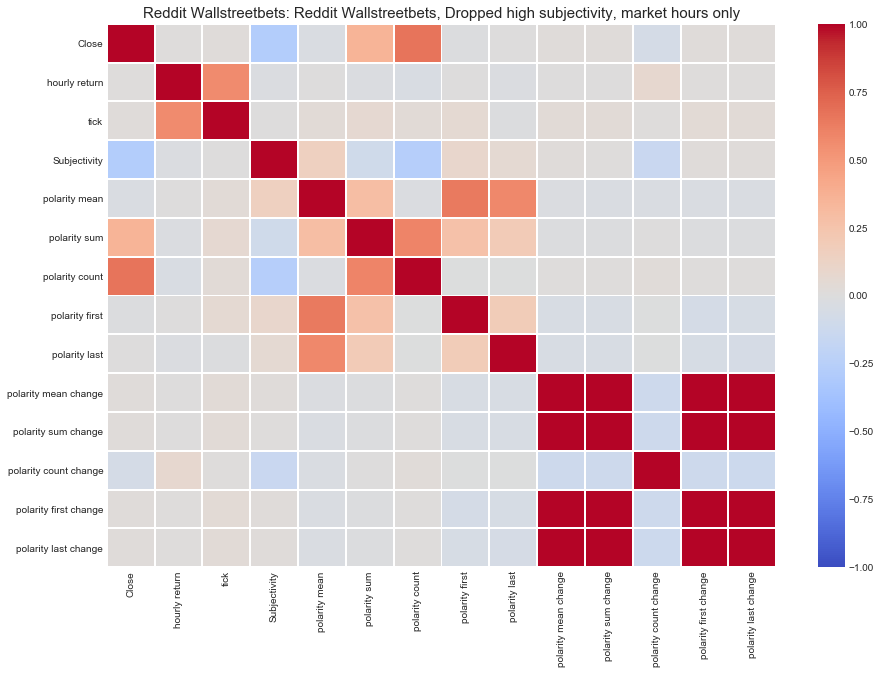

In [48]:
import seaborn as sns
plt.figure(figsize=(15,10))
plt.title('Reddit Wallstreetbets: Reddit Wallstreetbets, Dropped high subjectivity, market hours only', fontsize=15)
sns.heatmap(correlation_drop_2, vmin=-1, vmax=1, linewidth=1, cmap='coolwarm');

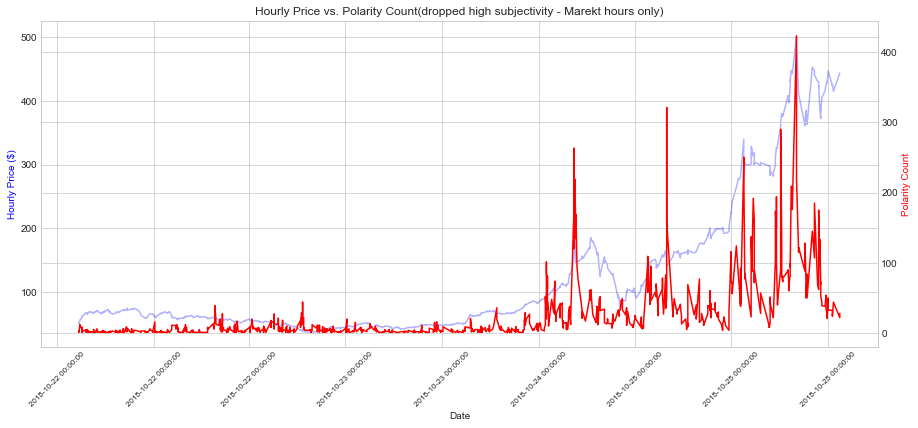

In [49]:
# plot the highest correlation with hourly return
date_only = df_2.index.get_level_values(0)

fig, ax1 = plt.subplots(figsize=(15,6))
ax1.set_title('Hourly Price vs. Polarity Count(dropped high subjectivity - Marekt hours only)')

ax2 = ax1.twinx()
ax1.plot(date_only, df_2['Close'], color='b', alpha=0.3)
ax2.plot(date_only, df_2['polarity count'], color='r')

ax1.set_xlabel('Date')
ax1.set_ylabel('Hourly Price ($)', color='b')
ax2.set_ylabel('Polarity Count', color='r')
ax1.set_xticklabels(date_only, rotation=45, size=8)

fig.show();

### 3. Using adjusted sentiment score for all texts regardless of market hours

In [50]:
# take the average polarity scores in the same hour window.
df_weight = df_weight.rename(columns = {'Adj Polarity':'Polarity'})
df_mean = df_weight.groupby(['date only', 'hour']).mean()
df_sum = df_weight.groupby(['date only', 'hour']).sum()
df_count = df_weight.groupby(['date only', 'hour']).count()
df_first = df_weight.groupby(['date only', 'hour']).first()
df_last = df_weight.groupby(['date only', 'hour']).last()
df_data = df_mean.copy()

In [51]:
df_data = df_data.rename(columns = {'Polarity':'polarity mean'})
df_data['polarity sum'] = df_sum['Polarity']
df_data['polarity count'] = df_count['Polarity']
df_data['polarity first'] = df_first['Polarity']
df_data['polarity last'] = df_last['Polarity']
df_data.head()

Close  hourly return  tick  Subjectivity  polarity mean  polarity sum  polarity count  polarity first  polarity last
date only  hour                                                                                                                      
2018-10-21 2       NaN            NaN   NaN      0.475000         -0.050        -0.050               1          -0.050         -0.050
           3       NaN            NaN   NaN      0.900000         -0.360        -0.360               1          -0.360         -0.360
           7       NaN            NaN   NaN      0.620000         -0.136        -0.136               1          -0.136         -0.136
           8       NaN            NaN   NaN      0.000000          0.000         0.000               1           0.000          0.000
           11      NaN            NaN   NaN      0.433333          0.060         0.180               3           0.000         -0.060

In [52]:
df_data['polarity mean change'] = df_data['polarity mean'].pct_change()
df_data['polarity sum change'] = df_data['polarity sum'].pct_change()
df_data['polarity count change'] = df_data['polarity count'].pct_change()
df_data['polarity first change'] = df_data['polarity first'].pct_change()
df_data['polarity last change'] = df_data['polarity last'].pct_change()
df_data.head()

Close  hourly return  tick  Subjectivity  polarity mean  polarity sum  polarity count  polarity first  polarity last  polarity mean change  polarity sum change  polarity count change  polarity first change  polarity last change
date only  hour                                                                                                                                                                                                                                     
2018-10-21 2       NaN            NaN   NaN      0.475000         -0.050        -0.050               1          -0.050         -0.050                   NaN                  NaN                    NaN                    NaN                   NaN
           3       NaN            NaN   NaN      0.900000         -0.360        -0.360               1          -0.360         -0.360              6.200000             6.200000                    0.0               6.200000              6.200000
           7       NaN            NaN   NaN      0.620000         -0.136        -0.136               1          -0.136         -0.136             -0.622222            -0.622222                    0.0              -0.622222             -0.622222
           8       NaN            NaN   NaN      0.000000          0.000         0.000               1           0.000          0.000             -1.000000            -1.000000                    0.0              -1.000000             -1.000000
           11      NaN            NaN   NaN      0.433333          0.060         0.180               3           0.000         -0.060                   inf                  inf                    2.0                    NaN                  -inf

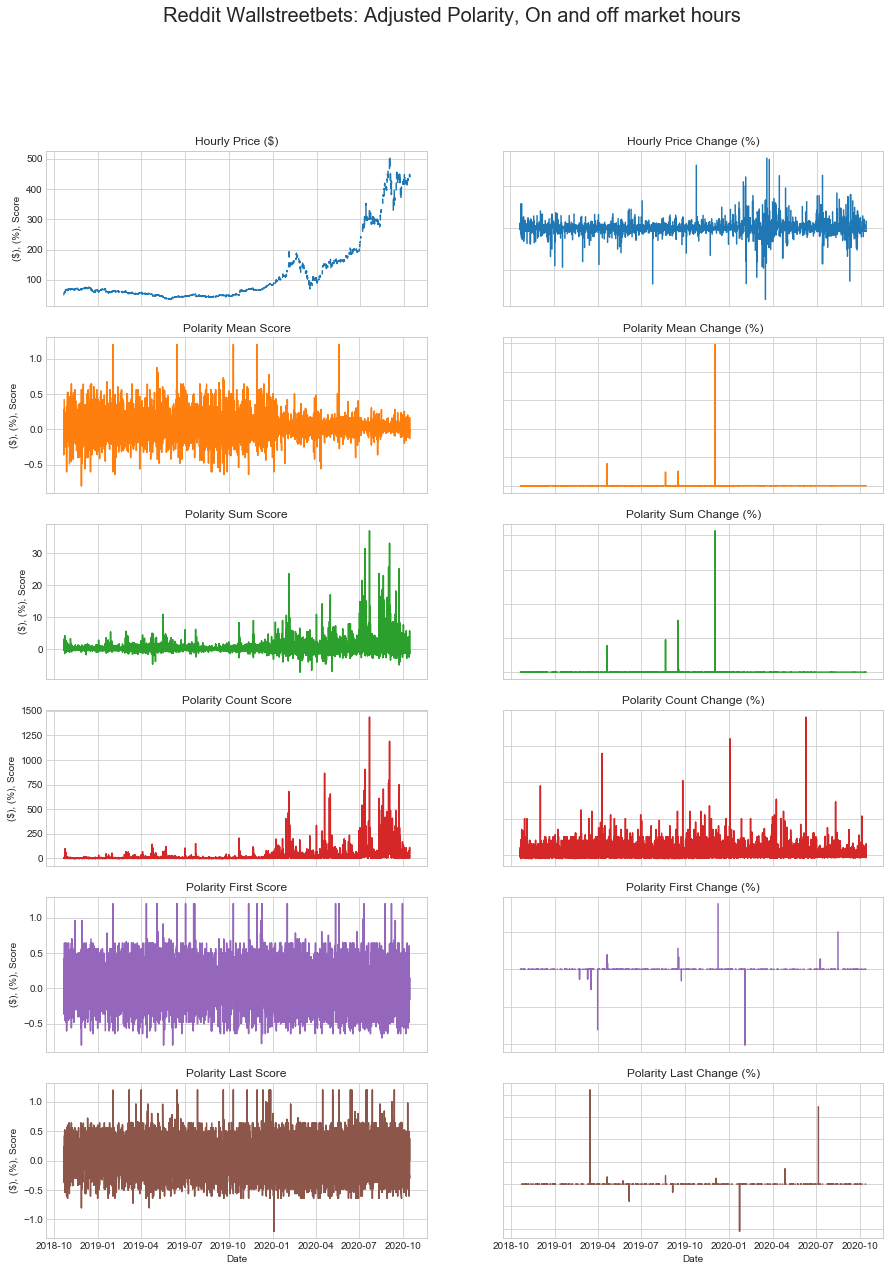

In [53]:
# plot total overviews
date_only = df_data.index.get_level_values(0)

fig, axs = plt.subplots(6, 2, figsize=(15,20))
fig.suptitle('Reddit Wallstreetbets: Adjusted Polarity, On and off market hours', fontsize=20)

axs[0, 0].plot(date_only, df_data['Close'])
axs[0, 0].set_title('Hourly Price ($)')
axs[1, 0].plot(date_only, df_data['polarity mean'], 'tab:orange')
axs[1, 0].set_title('Polarity Mean Score')
axs[2, 0].plot(date_only, df_data['polarity sum'], 'tab:green')
axs[2, 0].set_title('Polarity Sum Score')
axs[3, 0].plot(date_only, df_data['polarity count'], 'tab:red')
axs[3, 0].set_title('Polarity Count Score')
axs[4, 0].plot(date_only, df_data['polarity first'], 'tab:purple')
axs[4, 0].set_title('Polarity First Score')
axs[5, 0].plot(date_only, df_data['polarity last'], 'tab:brown')
axs[5, 0].set_title('Polarity Last Score')

axs[0, 1].plot(date_only, df_data['hourly return'])
axs[0, 1].set_title('Hourly Price Change (%)')
axs[1, 1].plot(date_only, df_data['polarity mean change'], 'tab:orange')
axs[1, 1].set_title('Polarity Mean Change (%)')
axs[2, 1].plot(date_only, df_data['polarity sum change'], 'tab:green')
axs[2, 1].set_title('Polarity Sum Change (%)')
axs[3, 1].plot(date_only, df_data['polarity count change'], 'tab:red')
axs[3, 1].set_title('Polarity Count Change (%)')
axs[4, 1].plot(date_only, df_data['polarity first change'], 'tab:purple')
axs[4, 1].set_title('Polarity First Change (%)')
axs[5, 1].plot(date_only, df_data['polarity last change'], 'tab:brown')
axs[5, 1].set_title('Polarity Last Change (%)')

for ax in axs.flat:
    ax.set(xlabel='Date', ylabel='($), (%), Score')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

In [54]:
correlation_weight = df_data.corr()
correlation_weight

Close  hourly return      tick  Subjectivity  polarity mean  polarity sum  polarity count  polarity first  polarity last  polarity mean change  polarity sum change  polarity count change  polarity first change  polarity last change
Close                  1.000000       0.034185 -0.006940     -0.074083      -0.038269      0.469527        0.623981       -0.040463      -0.004835             -0.013792            -0.014185              -0.037450              -0.010588             -0.000824
hourly return          0.034185       1.000000  0.547026      0.008380       0.013800      0.030026        0.033678       -0.011900       0.042269              0.004777             0.004788               0.058076              -0.013885             -0.015063
tick                  -0.006940       0.547026  1.000000      0.005690       0.009331      0.004814        0.004978       -0.010149       0.018159              0.014839             0.015143               0.044230              -0.002716             -0.025158
Subjectivity          -0.074083       0.008380  0.005690      1.000000       0.117557      0.005543       -0.031394        0.061080       0.062329              0.006121             0.006630              -0.009772               0.012445              0.010893
polarity mean         -0.038269       0.013800  0.009331      0.117557       1.000000      0.209050       -0.038518        0.516899       0.531461             -0.018678            -0.015347              -0.000124               0.003096              0.011398
polarity sum           0.469527       0.030026  0.004814      0.005543       0.209050      1.000000        0.749560        0.094428       0.116993             -0.008793            -0.008921               0.023803              -0.016202              0.044949
polarity count         0.623981       0.033678  0.004978     -0.031394      -0.038518      0.749560        1.000000       -0.027516      -0.022753             -0.004291            -0.005390               0.049956              -0.028281              0.040986
polarity first        -0.040463      -0.011900 -0.010149      0.061080       0.516899      0.094428       -0.027516        1.000000       0.134101             -0.007333            -0.002390               0.011595              -0.021597              0.004010
polarity last         -0.004835       0.042269  0.018159      0.062329       0.531461      0.116993       -0.022753        0.134101       1.000000             -0.021830            -0.021999               0.000216               0.018031              0.004692
polarity mean change  -0.013792       0.004777  0.014839      0.006121      -0.018678     -0.008793       -0.004291       -0.007333      -0.021830              1.000000             0.963829              -0.001306               0.033880              0.013884
polarity sum change   -0.014185       0.004788  0.015143      0.006630      -0.015347     -0.008921       -0.005390       -0.002390      -0.021999              0.963829             1.000000               0.002417               0.074218              0.022407
polarity count change -0.037450       0.058076  0.044230     -0.009772      -0.000124      0.023803        0.049956        0.011595       0.000216             -0.001306             0.002417               1.000000              -0.000304             -0.008921
polarity first change -0.010588      -0.013885 -0.002716      0.012445       0.003096     -0.016202       -0.028281       -0.021597       0.018031              0.033880             0.074218              -0.000304               1.000000              0.006990
polarity last change  -0.000824      -0.015063 -0.025158      0.010893       0.011398      0.044949        0.040986        0.004010       0.004692              0.013884             0.022407              -0.008921               0.006990              1.000000

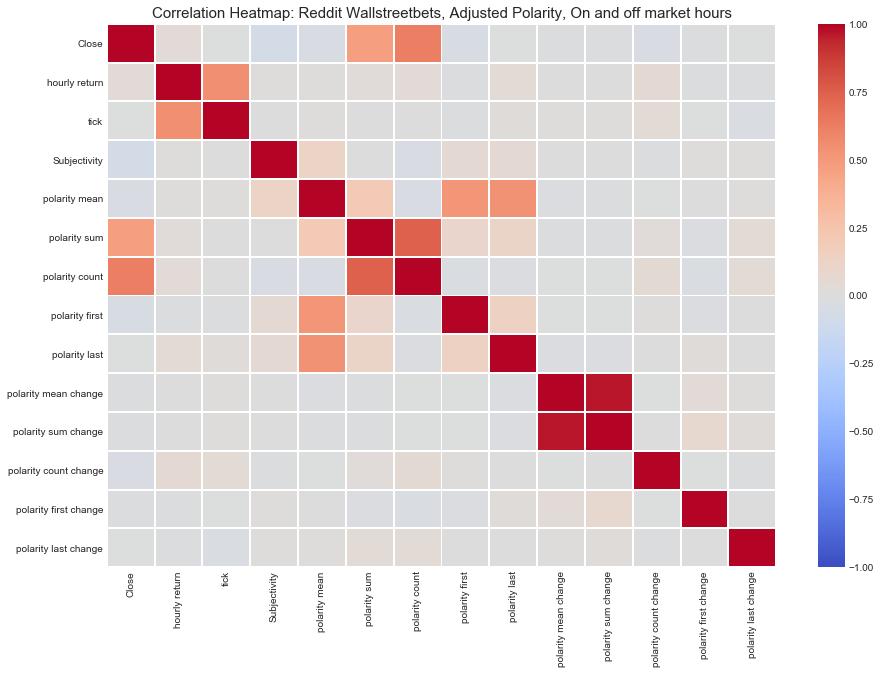

In [55]:
plt.figure(figsize=(15,10))
plt.title('Correlation Heatmap: Reddit Wallstreetbets, Adjusted Polarity, On and off market hours', fontsize=15)
sns.heatmap(correlation_weight, vmin=-1, vmax=1, linewidth=1, cmap='coolwarm');

### 4. Using adjusted sentiment score for the texts within market hours

In [56]:
# Dropping unmatching rows 
df_2 = df_data.dropna()
df_2

Close  hourly return  tick  Subjectivity  polarity mean  polarity sum  polarity count  polarity first  polarity last  polarity mean change  polarity sum change  polarity count change  polarity first change  polarity last change
date only  hour                                                                                                                                                                                                                                          
2018-10-22 9      51.431999       0.010650   1.0      0.307778      -0.066333     -0.331667               5    8.000000e-02       0.000000             -1.157937                 -inf                    inf          -8.095238e-01             -1.000000
           10     51.220001      -0.004122   0.0      0.233333       0.080000      0.160000               2    0.000000e+00       0.160000             -2.206030            -1.482412              -0.600000          -1.000000e+00                   inf
           12     51.382000      -0.000622   0.0      0.516667       0.267963      0.803889               3    6.400000e-01       0.038889              2.349537                  inf                    inf                    inf             -0.756944
           13     52.009998       0.012222   1.0      0.340000       0.034667      0.069333               2    0.000000e+00       0.069333             -0.870629            -0.913753              -0.333333          -1.000000e+00              0.782857
2018-10-23 8      55.200001       0.057431   1.0      0.318867       0.046908      0.985076              21    0.000000e+00      -0.087500             -0.797942             0.060805               4.250000          -1.000000e+00             -1.168000
           10     56.915001       0.025074   1.0      0.441507       0.051392      1.130635              22    2.742857e-01      -0.300000           -254.986824          -160.648861              -0.371429                    inf             -1.937500
           11     57.155998       0.004234   1.0      0.391179       0.077442      2.400713              31    0.000000e+00       0.320000              0.506880             1.123332               0.409091          -1.000000e+00             -2.066667
           12     58.548023       0.024355   1.0      0.393896       0.045755      0.777837              17    2.400000e-01       0.360000             -0.409172            -0.675998              -0.451613                    inf              0.125000
           13     58.645000       0.001656   1.0      0.391402       0.061704      1.357488              22    6.415459e-02       0.000000              0.348571             0.745209               0.294118          -7.326892e-01             -1.000000
           14     58.859997       0.003666   1.0      0.324564      -0.038486     -1.116083              29    0.000000e+00      -0.400000             -1.623714            -1.822168               0.318182          -1.000000e+00                  -inf
2018-10-24 8      57.579998      -0.021746   0.0      0.502099       0.000136      0.003003              22    0.000000e+00       0.125146             -0.999147            -0.996246               3.400000          -1.000000e+00              1.681704
           9      58.322498       0.012895   1.0      0.389271      -0.013355     -0.173611              13    1.854167e-01       0.000000            -98.839405           -58.814194              -0.409091                    inf             -1.000000
           10     59.876862       0.026651   1.0      0.560562       0.139073      0.695364               5    3.000000e-01      -0.030303            -11.413787            -5.005303              -0.615385           6.179775e-01                  -inf
           11     59.105999      -0.012874   0.0      0.500093      -0.057986     -0.695833              12    6.400000e-01       0.000000             -1.416948            -2.000675               1.400000           1.133333e+00             -1.000000
           14     57.7

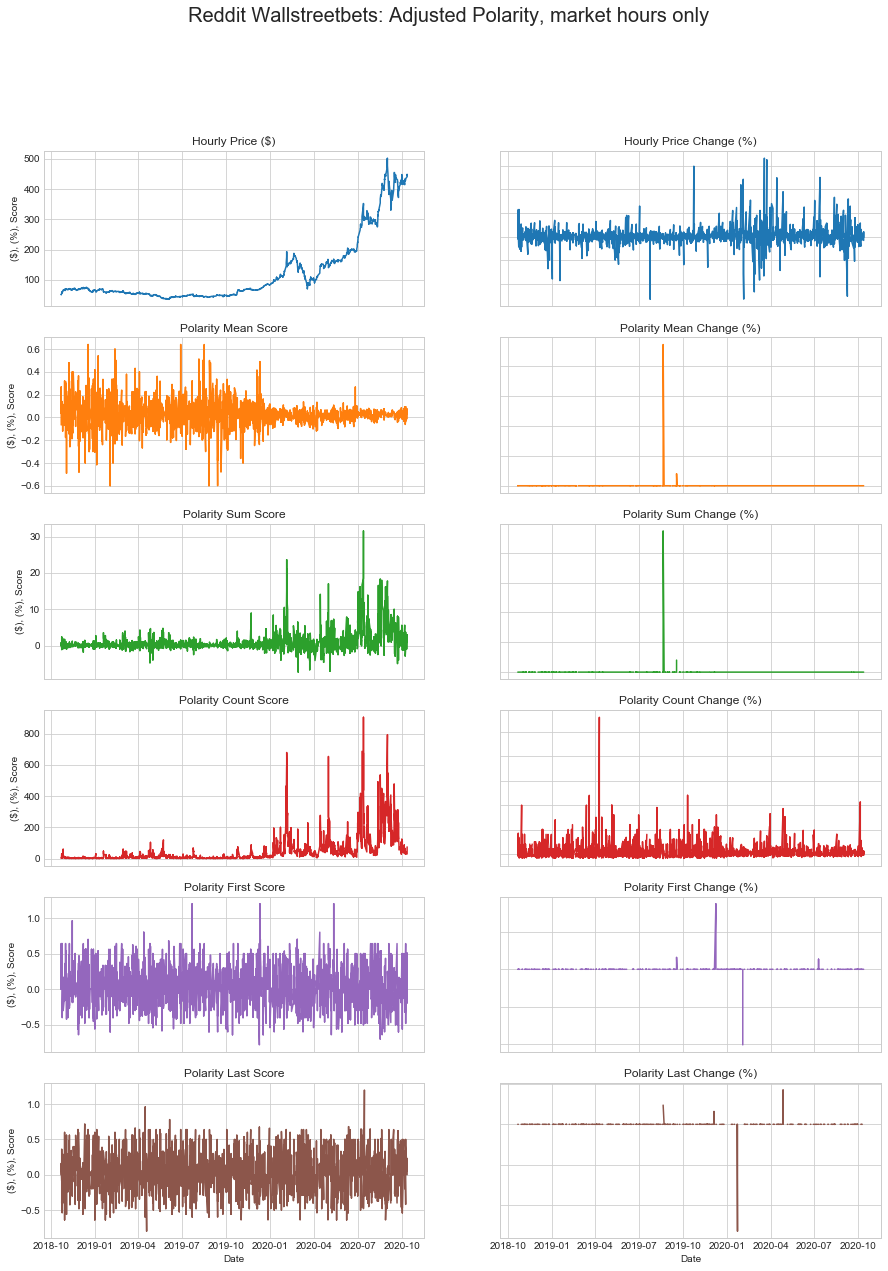

In [57]:
# plot total overviews
date_only = df_2.index.get_level_values(0)

fig, axs = plt.subplots(6, 2, figsize=(15,20))
fig.suptitle('Reddit Wallstreetbets: Adjusted Polarity, market hours only', fontsize=20)

axs[0, 0].plot(date_only, df_2['Close'])
axs[0, 0].set_title('Hourly Price ($)')
axs[1, 0].plot(date_only, df_2['polarity mean'], 'tab:orange')
axs[1, 0].set_title('Polarity Mean Score')
axs[2, 0].plot(date_only, df_2['polarity sum'], 'tab:green')
axs[2, 0].set_title('Polarity Sum Score')
axs[3, 0].plot(date_only, df_2['polarity count'], 'tab:red')
axs[3, 0].set_title('Polarity Count Score')
axs[4, 0].plot(date_only, df_2['polarity first'], 'tab:purple')
axs[4, 0].set_title('Polarity First Score')
axs[5, 0].plot(date_only, df_2['polarity last'], 'tab:brown')
axs[5, 0].set_title('Polarity Last Score')

axs[0, 1].plot(date_only, df_2['hourly return'])
axs[0, 1].set_title('Hourly Price Change (%)')
axs[1, 1].plot(date_only, df_2['polarity mean change'], 'tab:orange')
axs[1, 1].set_title('Polarity Mean Change (%)')
axs[2, 1].plot(date_only, df_2['polarity sum change'], 'tab:green')
axs[2, 1].set_title('Polarity Sum Change (%)')
axs[3, 1].plot(date_only, df_2['polarity count change'], 'tab:red')
axs[3, 1].set_title('Polarity Count Change (%)')
axs[4, 1].plot(date_only, df_2['polarity first change'], 'tab:purple')
axs[4, 1].set_title('Polarity First Change (%)')
axs[5, 1].plot(date_only, df_2['polarity last change'], 'tab:brown')
axs[5, 1].set_title('Polarity Last Change (%)')

for ax in axs.flat:
    ax.set(xlabel='Date', ylabel='($), (%), Score')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

In [58]:
correlation_weight_2 = df_2.corr()
correlation_weight_2

Close  hourly return      tick  Subjectivity  polarity mean  polarity sum  polarity count  polarity first  polarity last  polarity mean change  polarity sum change  polarity count change  polarity first change  polarity last change
Close                  1.000000       0.041372  0.014929     -0.136822      -0.046805      0.462088        0.634304       -0.045497       0.001118             -0.015880            -0.016232              -0.048698              -0.011969             -0.001186
hourly return          0.041372       1.000000  0.535368      0.008330       0.019199      0.036177        0.038851       -0.010161       0.035970              0.005498             0.005461               0.068837              -0.014829             -0.016725
tick                   0.014929       0.535368  1.000000      0.019214       0.012653      0.019145        0.020777       -0.002391       0.009214              0.018196             0.018465               0.055195              -0.002956             -0.028094
Subjectivity          -0.136822       0.008330  0.019214      1.000000       0.103238     -0.052519       -0.096871        0.057876       0.044369             -0.033856            -0.034564              -0.041375               0.038006             -0.006628
polarity mean         -0.046805       0.019199  0.012653      0.103238       1.000000      0.203483       -0.031698        0.417250       0.421527             -0.035432            -0.036525              -0.024398              -0.040563              0.012856
polarity sum           0.462088       0.036177  0.019145     -0.052519       0.203483      1.000000        0.751682        0.045809       0.108812             -0.010908            -0.011133               0.007018              -0.027296              0.044898
polarity count         0.634304       0.038851  0.020777     -0.096871      -0.031698      0.751682        1.000000       -0.051622       0.006664             -0.011904            -0.012180               0.035283              -0.051167             -0.014845
polarity first        -0.045497      -0.010161 -0.002391      0.057876       0.417250      0.045809       -0.051622        1.000000       0.047259             -0.001041            -0.000947               0.022152              -0.086214              0.009603
polarity last          0.001118       0.035970  0.009214      0.044369       0.421527      0.108812        0.006664        0.047259       1.000000             -0.028277            -0.028431              -0.010954              -0.002710              0.049159
polarity mean change  -0.015880       0.005498  0.018196     -0.033856      -0.035432     -0.010908       -0.011904       -0.001041      -0.028277              1.000000             1.000000               0.010492               0.009963              0.167687
polarity sum change   -0.016232       0.005461  0.018465     -0.034564      -0.036525     -0.011133       -0.012180       -0.000947      -0.028431              1.000000             1.000000               0.010492               0.009961              0.167695
polarity count change -0.048698       0.068837  0.055195     -0.041375      -0.024398      0.007018        0.035283        0.022152      -0.010954              0.010492             0.010492               1.000000               0.002588             -0.005620
polarity first change -0.011969      -0.014829 -0.002956      0.038006      -0.040563     -0.027296       -0.051167       -0.086214      -0.002710              0.009963             0.009961               0.002588               1.000000             -0.000028
polarity last change  -0.001186      -0.016725 -0.028094     -0.006628       0.012856      0.044898       -0.014845        0.009603       0.049159              0.167687             0.167695              -0.005620              -0.000028              1.000000

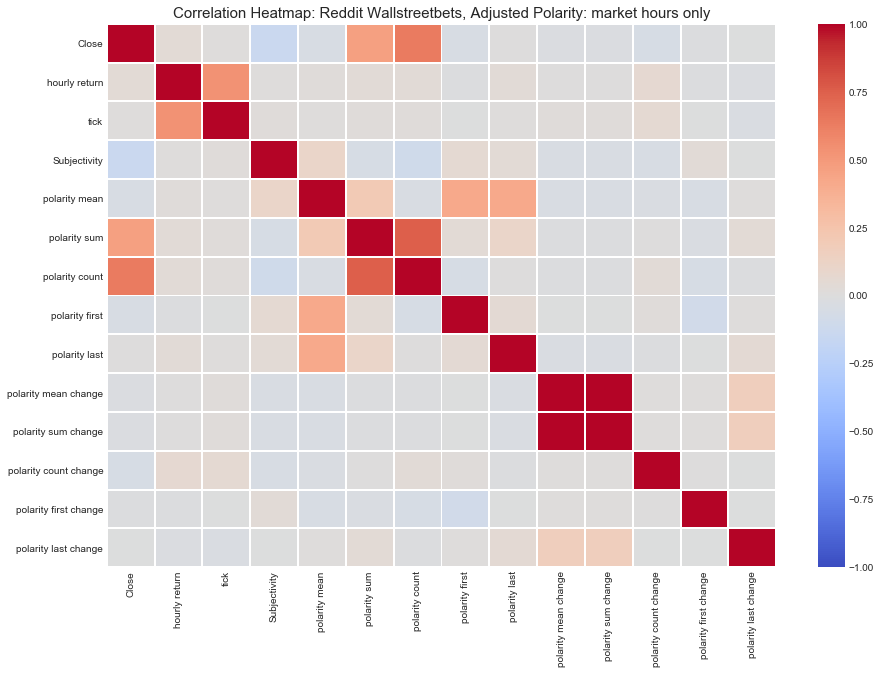

In [59]:
plt.figure(figsize=(15,10))
plt.title('Correlation Heatmap: Reddit Wallstreetbets, Adjusted Polarity: market hours only', fontsize=15)
sns.heatmap(correlation_weight_2, vmin=-1, vmax=1, linewidth=1, cmap='coolwarm');